In [1]:
import cProfile
import os
import statistics as st
import plotly.graph_objects as go
import random as rd
import time
import pandas as pd
import math
from collections import defaultdict
import numpy as np
import itertools as it
import Utilities.experiment_utils as eu
import unit_test as ut
import Games.mnk as mnk
import Agents.random as arand
import Agents.vanilla_mcts as mcts 
import Agents.siea_mcts as siea_mcts
import Games.function_optimisation as fo
import Utilities.logs_management as lm
#cProfile.run("wins =  random_games(10000, base_gs)")

In [2]:
#Unit test
#ut.run(agent_names = ["siea_mcts_unpaired"])
#ut.test_tree_cloning()
#ut.test_fm_calls()
#ut.run()
a = ut.test_mcts_tree(iterations=1, game_name = "fo1d1p", agent_name = "siea_mcts")


edge_action:None, visits:1, avg_reward:0, children:1, tree_policy_formula:None
--edge_action:[['0.000', '0.500']]t0, visits:1, avg_reward:0, children:0, tree_policy_formula:0


In [29]:
a.iteration(a.root_node)
print(a.view_mcts_tree())


edge_action:None, visits:2458, avg_reward:0.651, children:2, tree_policy_formula:None
--edge_action:[['0.000', '0.500']]t0, visits:1819, avg_reward:0.649, children:0, tree_policy_formula:2.5
--edge_action:[['0.500', '1.000']]t0, visits:639, avg_reward:0.656, children:2, tree_policy_formula:3.78
----edge_action:[['0.500', '0.750']]t0, visits:13, avg_reward:0.923, children:2, tree_policy_formula:20.9
------edge_action:[['0.500', '0.625']]t0, visits:6, avg_reward:1, children:2, tree_policy_formula:19.5
--------edge_action:[['0.562', '0.625']]t0, visits:3, avg_reward:1, children:2, tree_policy_formula:22.9
----------edge_action:[['0.562', '0.594']]t0, visits:1, avg_reward:1, children:0, tree_policy_formula:30.6
----------edge_action:[['0.594', '0.625']]t0, visits:1, avg_reward:1, children:0, tree_policy_formula:30.6
--------edge_action:[['0.500', '0.562']]t0, visits:2, avg_reward:1, children:1, tree_policy_formula:27.8
----------edge_action:[['0.500', '0.531']]t0, visits:1, avg_reward:1, 

In [8]:
n_bins = 2**7+1
experiment_path = os.path.join("Outputs","FO_single_decision3")
file_path_list = lm.find_log_files("tree_data.csv", experiment_path)
print(["\n" + f for f in file_path_list])
for function_index in range(1):#[1,3]:
  data_list = []
  subplot_titles = []
  file_paths = []

  #Add ea vanilla
  paths_to_remove = []
  for file_path in [f for f in file_path_list if "Function_" + str(function_index) in f]:
      agent_name = file_path.split(os.sep)[-2]
      if "_c" in agent_name:
        #data_list.append(pd.read_csv(file_path))
        if "1_4142" in agent_name:
           agent_name= agent_name.replace("1_4142", "\u221A\u03052\u0305")
        if "0_5" in agent_name:
           agent_name= agent_name.replace("0_5", "0.5")
        agent_name = agent_name.replace("MCTS_", "MCTS ")
        agent_name = agent_name.replace(" c", " c = ")
        subplot_titles += [agent_name]
        file_paths += [file_path]
        paths_to_remove += [file_path]
  for path in paths_to_remove:
    file_path_list.remove(path)

  paths_to_remove = []
  for file_path in [f for f in file_path_list if "Function_" + str(function_index) in f]:
    agent_name = file_path.split(os.sep)[-2]
    if "EA_" in agent_name and not "SIEA_" in agent_name:
      #data_list.append(pd.read_csv(file_path))
      agent_name= agent_name.replace("_its", " ")
      agent_name += " iterations"
      subplot_titles += [agent_name]
      file_paths += [file_path]
  for path in paths_to_remove:
    file_path_list.remove(path)

  for file_path in [f for f in file_path_list if "Function_" + str(function_index) in f]:
    agent_name = file_path.split(os.sep)[-2]
    if "SIEA_" in agent_name:
      data_list.append(pd.read_csv(file_path))
      agent_name= agent_name.replace("_its", " ")
      agent_name += " iterations"
      subplot_titles += [agent_name]
      file_paths += [file_path]
    
  if subplot_titles != [] and data_list != []:
    fop = fo.GameState(function_index=function_index)

    
    for j in range(10):
      new_data_list = []
      subplot_titles = []
      dat = data_list[0]
      for i in range(j*10,(j+1)*10):
        tdat = dat.loc[dat["run"] == i]
        new_data_list = new_data_list + [tdat]
        #if i==25:
        #  my_dat = tdat
        subplot_titles += ["Run " + str(i)]
      subdata_list = new_data_list

      plot = eu.fo_tree_histogram(subdata_list, 
                            fop.function, 
                            "",#"Function"+str(function_index+1) , 
                            divisions = 3,
                            n_buckets = n_bins, 
                            subplot_titles = [""] + subplot_titles,#file_paths, 
                            max_x_location=fop.max_location[0],
                            y_ref_value=None)
      #plot.write_image(os.path.join(experiment_path, "F" + str(function_index+1) + "_results"+ str(n_bins) + '.png'))#, width=800, height=1000)
      plot.show()

['\nOutputs\\FO_single_decision3\\Function_0\\EA_MCTS_its2570\\tree_data.csv', '\nOutputs\\FO_single_decision3\\Function_0\\EA_MCTS_its5000\\tree_data.csv', '\nOutputs\\FO_single_decision3\\Function_0\\MCTS_c0_5\\tree_data.csv', '\nOutputs\\FO_single_decision3\\Function_0\\MCTS_c1\\tree_data.csv', '\nOutputs\\FO_single_decision3\\Function_0\\MCTS_c1_4142\\tree_data.csv', '\nOutputs\\FO_single_decision3\\Function_0\\MCTS_c2\\tree_data.csv', '\nOutputs\\FO_single_decision3\\Function_0\\MCTS_c3\\tree_data.csv', '\nOutputs\\FO_single_decision3\\Function_0\\SIEA_MCTS_its2570\\tree_data.csv', '\nOutputs\\FO_single_decision3\\Function_0\\SIEA_MCTS_its5000\\tree_data.csv', '\nOutputs\\FO_single_decision3\\Function_1\\EA_MCTS_its2570\\tree_data.csv', '\nOutputs\\FO_single_decision3\\Function_1\\EA_MCTS_its5000\\tree_data.csv', '\nOutputs\\FO_single_decision3\\Function_1\\MCTS_c0_5\\tree_data.csv', '\nOutputs\\FO_single_decision3\\Function_1\\MCTS_c1\\tree_data.csv', '\nOutputs\\FO_single_decisi

In [ ]:
max_fm = 50000
max_iterations = 50000000
rollouts = 1
games = 30
game = mnk.GameState(6,6,4)
game.set_initial_state()
agent0 = mcts.MCTS_Player(max_fm=max_fm, max_iterations = max_iterations, rollouts = rollouts, logs=True)
agent1 = siea_mcts.SIEA_MCTS_Player(max_fm=max_fm, max_iterations = max_iterations, rollouts = rollouts, logs=True)
agent2 = siea_mcts.SIEA_MCTS_Player(max_fm=max_fm, max_iterations = max_iterations, rollouts = rollouts, logs=True, unpaired_evolution=True, name="SIEA_MCTS_unpaired")
agent3 = arand.RandomPlayer()
eu.play_match([agent0, agent1], game, games, file_path=os.path.join("Outputs","Test_match3"), logs=True, logs_dispatch_after=2)

In [2]:
#Simple comparison of algorithms
function_index = 3
runs = 20
random_seed = 3
iterations = 100
unique_value = str(rd.randint(1,2**20))
print("Logs identifier: " + unique_value)
game_state = fo.GameState(function_index=function_index, for_test=True  )
game_state.set_initial_state()


mcts_player = siea_mcts.SIEA_MCTS_Player(max_iterations=iterations, logs=True, es_semantics_l=0.1, es_semantics_u=0.5, unpaired_evolution=False, name="SIEA_MCTS")
#mcts_player = mcts.MCTS_Player(max_iterations=iterations, logs=True)
agent1_logs_path = os.path.join("Outputs", "Test", "fo_single_decision_" + unique_value, mcts_player.name)
action = eu.mcts_decision_analysis(game_state, 
                                mcts_player, 
                                agent1_logs_path, 
                                runs, 
                                random_seed)
print("Agent", mcts_player.name, " chose action", action)


mcts_player = siea_mcts.SIEA_MCTS_Player(max_iterations=iterations, logs=True, es_semantics_l=0.1, es_semantics_u=0.5, unpaired_evolution=True, name="SIEA_MCTSu")
agent2_logs_path = os.path.join("Outputs", "Test", "fo_single_decision_" + unique_value, mcts_player.name)
action = eu.mcts_decision_analysis(game_state, 
                                mcts_player, 
                                os.path.join("Outputs", "Test", "fo_single_decision_" + unique_value, mcts_player.name), 
                                runs, 
                                random_seed)
print("Agent", mcts_player.name, " chose action", action)
test_path = os.path.join("Outputs", "Test", "fo_single_decision_" + unique_value)
for file_name in ["results.csv", "logs_by_run.csv", "evolution_logs.csv", "tree_data.csv"]:
    found_log_files = lm.find_log_files(file_name, test_path)
    #print(found_log_files)
    collected_logs = lm.combine_logs(test_path, "collective_"+file_name, found_log_files)

Logs identifier: 258217
Agent SIEA_MCTS  chose action [['0.500', '1.000']]t0
Agent SIEA_MCTSu  chose action [['0.000', '0.500']]t0
['Outputs\\Test\\fo_single_decision_258217\\SIEA_MCTS\\results.csv', 'Outputs\\Test\\fo_single_decision_258217\\SIEA_MCTSu\\results.csv']
['Outputs\\Test\\fo_single_decision_258217\\SIEA_MCTS\\logs_by_run.csv', 'Outputs\\Test\\fo_single_decision_258217\\SIEA_MCTSu\\logs_by_run.csv']
['Outputs\\Test\\fo_single_decision_258217\\SIEA_MCTS\\Run 0\\evolution_logs.csv', 'Outputs\\Test\\fo_single_decision_258217\\SIEA_MCTS\\Run 1\\evolution_logs.csv', 'Outputs\\Test\\fo_single_decision_258217\\SIEA_MCTS\\Run 10\\evolution_logs.csv', 'Outputs\\Test\\fo_single_decision_258217\\SIEA_MCTS\\Run 11\\evolution_logs.csv', 'Outputs\\Test\\fo_single_decision_258217\\SIEA_MCTS\\Run 12\\evolution_logs.csv', 'Outputs\\Test\\fo_single_decision_258217\\SIEA_MCTS\\Run 13\\evolution_logs.csv', 'Outputs\\Test\\fo_single_decision_258217\\SIEA_MCTS\\Run 14\\evolution_logs.csv', 'Outp

In [ ]:
logs_path = os.path.join("Outputs","FO_single_decision_5000")
random_seed = 10
runs = 30
iterations = 5000
es_lambda = 4
es_fitness_iterations = 30
es_generations = 20
c_list = [0.5, 1, math.sqrt(2),2,3]
c_names = ["0_5", "1", "1_4142", "2", "3"]
agents = []
function_indexes = []
function_indexes = [1,3]#0,1,2,3,4]
#function_indexes += [5,6,7,8,9]

agents = agents + [siea_mcts.SIEA_MCTS_Player(max_iterations=its, 
                                         es_lambda=es_lambda, 
                                         es_fitness_iterations=es_fitness_iterations,
                                        es_generations=es_generations,
                                        es_semantics_l=0.1,
                                        es_semantics_u = 0.5,
                                        name = "SIEA_MCTS_Clone_Expand_its" + str(its),
                                         logs=True) for its in [iterations, iterations-(es_fitness_iterations*es_generations*es_lambda)]]
                                        
for function_index in function_indexes:
    print("In function " + str(function_index))
    game_state = fo.GameState(function_index=function_index, n_players=1)
    game_state.set_initial_state()
    for agent in agents:
        print("In agent " + agent.name)
        action = eu.mcts_decision_analysis(game_state = game_state,
                                             mcts_player = agent,
                                             logs_path = os.path.join(logs_path,"Function_" + str(function_index), agent.name),
                                             runs = runs,
                                             random_seed = random_seed)   


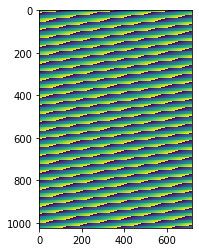

In [2]:
import numpy as np
data = np.arange(0, 737280, 1, np.uint8)
data = np.reshape(data, (1024, 720))
from matplotlib import pyplot as plt
plt.imshow(data, interpolation='nearest')
plt.show()